## Test a simple  regression model

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [2]:
dbname = 'traffic_police_combined'
username = 'along528'
pswd = 'password'
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

In [50]:
def process_df(df):
    #just look at one year for now
    df = df.convert_objects(convert_numeric=True)
    #normalize by number of officers in department
    for column in ['ftgangoff','ftdrugoff','ftterroff','numcpo',
               'white','black','hispanic','asian','nathaw',
               'amerind','multrace','unkrace','male','female']:
        df[column] = df[column].div(df['swnftemp'],axis='index')
    df = df.reset_index().drop('level_0',1)
    df = df[df['zipcode']!=27611] #remove nc state highway patrol
    df['black_over_white'] = df['black'].div(df['white'],axis='index')
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    return df

In [109]:
sql_query = """
SELECT  * FROM combined_alltime_rpsi_searches_over_stops_disparity;
"""
data = process_df(pd.read_sql_query(sql_query,con))
data
#with pd.option_context("display.max_rows",100,"display.max_columns", 100):
#    print data[['agency','population']]

/Users/along528/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,index,city,state,zipcode,population,agency,swnftemp,ftgangoff,ftdrugoff,ftterroff,numcpo,drivhis,cultdiv,white,black,hispanic,asian,nathaw,amerind,multrace,unkrace,male,female,carpat,footpat,cptrnnew,cptrninserv,cpmission,cpplan,cpnone,lessthanplcy,racialprplcy,rpsi,black_over_white
1,1,Kure Beach,NC,28449,2494,KURE BEACH POLICE DEPT,10,0.000000,0.000000,0.00000,0.000000,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,1,8,1,1,1,0,1,0,0.721688,0.000000
2,2,Charlotte,NC,28202,733291,CHARLOTTE-MECKLENBURG POLICE DEPT,1481,0.004051,0.002701,0.00135,0.670493,1,0,0.798785,0.160702,0.023633,0.015530,0.000000,0.001350,0.000000,0.002701,0.862255,0.137745,1,1,1,1,1,1,0,1,1,2.041388,0.201183
3,3,Jacksonville,NC,28541,70368,JACKSONVILLE POLICE DEPARTMENT,107,0.000000,0.009346,0.00000,0.074766,1,0,0.747664,0.121495,0.074766,0.046729,0.000000,0.009346,0.000000,0.000000,0.682243,0.317757,1,1,1,1,1,1,0,1,1,2.635550,0.162500
4,4,Holly Springs,NC,27540,18704,HOLLY SPRINGS POLICE DEPARTMENT,36,0.000000,0.000000,0.00000,0.000000,1,0,0.805556,0.166667,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.833333,0.166667,1,1,0,3,0,0,0,1,0,1.791152,0.206897
5,5,Concord,NC,28026,63284,CONCORD POLICE DEPARTMENT,148,0.000000,0.000000,0.00000,0.844595,1,0,0.878378,0.067568,0.047297,0.000000,0.006757,0.000000,0.000000,0.000000,0.858108,0.141892,1,1,1,3,1,1,0,1,1,1.257111,0.076923
6,6,Greenville,NC,27835,73319,GREENVILLE POLICE DEPARTMENT,170,0.023529,0.052941,0.00000,1.000000,1,0,0.770588,0.188235,0.029412,0.005882,0.000000,0.005882,0.000000,0.000000,0.852941,0.147059,1,1,1,1,1,1,0,1,1,1.602506,0.244275
7,7,Surf City,NC,28445,1873,SURF CITY POLICE DEPARTMENT,17,0.000000,0.058824,0.00000,0.058824,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.941176,0.058824,1,1,1,1,1,1,0,1,1,1.236153,0.000000
8,8,Goldsboro,NC,27533,38053,GOLDSBORO POLICE DEPARTMENT,107,0.037383,0.037383,0.00000,0.093458,1,0,0.775701,0.130841,0.084112,0.009346,0.000000,0.000000,0.000000,0.000000,0.906542,0.093458,1,1,0,0,0,0,1,1,1,1.746017,0.168675
9,9,Mint Hill,NC,28227,18810,MINT HILL POLICE DEPARTMENT,28,0.000000,0.000000,0.00000,0.071429,1,0,0.857143,0.035714,0.071429,0.000000,0.000000,0.000000,0.035714,0.000000,0.857143,0.142857,1,1,0,1,1,0,0,1,1,1.092824,0.041667
10,10,Pilot Mountain,NC,27041,1276,PILOT MOUNTAIN POLICE DEPT,8,0.000000,0.000000,0.00000,1.000000,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,1,1,1,0,0,0,1,1,1.330561,0.000000


In [110]:
sql_query = """
SELECT  * FROM survey_features;
"""
survey_data = process_df(pd.read_sql_query(sql_query,con))
survey_data
#with pd.option_context("display.max_rows",100,"display.max_columns", 100):
#    print data[['agency','population']]

/Users/along528/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,index,city,state,zipcode,population,agency,swnftemp,ftgangoff,ftdrugoff,ftterroff,numcpo,drivhis,cultdiv,white,black,hispanic,asian,nathaw,amerind,multrace,unkrace,male,female,carpat,footpat,cptrnnew,cptrninserv,cpmission,cpplan,cpnone,lessthanplcy,racialprplcy,black_over_white
45,45,Anchorage,AK,99507,284142,ANCHORAGE POLICE DEPARTMENT,385,0.015584,0.031169,0.015584,0.015584,1,0,0.841558,0.054545,0.036364,0.044156,0.01039,0.005195,0.007792,0.000000,0.854545,0.145455,1,1,0,3,1,1,0,1,1,0.064815
46,46,Ketchikan,AK,99901,7384,KETCHIKAN POLICE DEPARTMENT,23,0.000000,0.000000,0.000000,0.000000,1,0,0.782609,0.000000,0.086957,0.086957,0.00000,0.043478,0.000000,0.000000,0.956522,0.043478,1,1,1,3,1,0,0,1,0,0.000000
49,49,Tuscaloosa,AL,35401,83811,TUSCALOOSA POLICE DEPARTMENT,264,0.000000,0.041667,0.003788,0.026515,1,0,0.840909,0.147727,0.007576,0.003788,0.00000,0.000000,0.000000,0.007576,0.946970,0.053030,1,1,1,1,1,1,0,1,1,0.175676
50,50,Mobile,AL,36606,253842,MOBILE POLICE DEPARTMENT,526,0.000000,0.009506,0.001901,0.057034,1,0,0.703422,0.279468,0.007605,0.005703,0.00000,0.003802,0.000000,0.000000,0.908745,0.091255,1,1,1,1,1,1,0,1,1,0.397297
51,51,Anniston,AL,36202,23736,ANNISTON POLICE DEPARTMENT,81,0.000000,0.012346,0.000000,0.000000,1,0,0.925926,0.061728,0.000000,0.012346,0.00000,0.000000,0.000000,0.000000,0.987654,0.012346,1,0,1,2,0,0,0,1,1,0.066667
52,52,Birmingham,AL,35203,227686,BIRMINGHAM POLICE DEPARTMENT,768,0.005208,0.000000,0.001302,0.601562,1,0,0.369792,0.623698,0.005208,0.001302,0.00000,0.000000,0.000000,0.000000,0.826823,0.173177,1,1,1,3,1,1,0,1,1,1.686620
53,53,Montgomery,AL,36101,202062,MONTGOMERY POLICE DEPARTMENT,491,0.004073,0.002037,0.004073,0.024440,1,1,0.574338,0.407332,0.010183,0.008147,0.00000,0.000000,0.000000,0.000000,0.845214,0.154786,1,1,1,0,1,1,0,1,0,0.709220
54,54,Hoover,AL,35216,69527,HOOVER POLICE DEPARTMENT,156,0.000000,0.000000,0.000000,0.000000,1,0,0.897436,0.096154,0.006410,0.000000,0.00000,0.000000,0.000000,0.000000,0.910256,0.089744,1,0,3,3,1,0,0,1,1,0.107143
55,55,Dothan,AL,36303,64931,DOTHAN POLICE DEPARTMENT,148,0.000000,0.000000,0.000000,0.000000,1,0,0.905405,0.074324,0.013514,0.000000,0.00000,0.006757,0.000000,0.000000,0.925676,0.074324,1,1,8,0,0,0,0,1,0,0.082090
56,56,Homewood,AL,35259,24180,HOMEWOOD POLICE DEPT,70,0.000000,0.000000,0.000000,0.028571,1,0,0.857143,0.128571,0.014286,0.000000,0.00000,0.000000,0.000000,0.000000,0.928571,0.071429,1,0,8,2,1,0,0,1,1,0.150000


# Explore features

plot histogram of rpsi

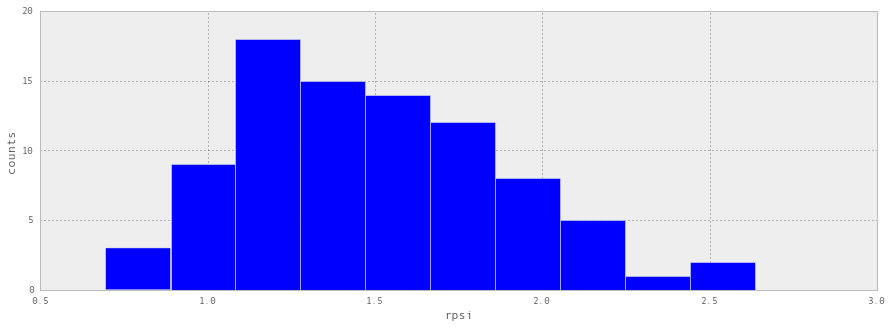

mean = 1.48677320576 stdev = 0.393306414841
median = 1.43684530811


In [52]:
#tmpdata = data[data['rpsi']<10]
#tmpdata = data[data['rpsi']>-10]

plt.hist(data['rpsi'].values,color='b',bins=10)
plt.ylim([0,20])
plt.xlabel('rpsi')
plt.ylabel('counts')
plt.show()
plt.clf()
print "mean =",data['rpsi'].values.mean(),"stdev =",data['rpsi'].values.std()
print "median =",np.median(data['rpsi'].values)

# Clean data

In [111]:
#data = data[data['population']>=10000.]

def drop(df):
    return df.drop(['city','index','state','zipcode','agency','hispanic',
                 'asian','nathaw','amerind','multrace','unkrace',
                 'male','female','lessthanplcy','drivhis'],1)
data = drop(data)
survey_data = drop(survey_data)
numeric_categories = ['black_over_white','swnftemp','ftdrugoff','ftterroff',
                      'numcpo','white','black','population'] #,
                      #'population']
print data.shape
print survey_data.shape

(87, 19)
(2741, 18)


In [16]:
#tmpdata = data[data['rpsi']<4.]
tmpdata = data[data['rpsi']>=0.]
ncolumns = tmpdata.drop('rpsi',1).columns.shape[0]
for i,column in enumerate(tmpdata.drop('rpsi',1).columns):
    plt.scatter(tmpdata[column].values,tmpdata['rpsi'].values)
    plt.xlabel(column)
    plt.ylabel('rpsi')
    plt.savefig('images/%s.png' % (column))
    plt.clf()


# Build Model

In [125]:

from sklearn.preprocessing import OneHotEncoder
class Scaler:
    def __init__(self,df,num_cat,label='rpsi'):
        num_categories = list(num_cat)
        if label!='': num_categories.append(label)
        X_int = np.array(df.drop(num_categories,1))
        X_num = None
        if label!='':
            X_num = np.array(df[num_categories].drop(label,1))
        else:
            X_num = np.array(df[num_categories])

        self.enc = OneHotEncoder(sparse=False) #otherwise hard to combined
        self.enc.fit(X_int)
        self.mean = np.mean(X_num, axis=0)
        self.std = np.std(X_num, axis=0)
    def scale(self,df,num_cat,label='rpsi'):
        num_categories = list(num_cat)
        if label!='': num_categories += [label]
        X_int = np.array(df.drop(num_categories,1))
        self.X_int = self.enc.transform(X_int)
        X_num = None
        if label!='':
            X_num = np.array(df[num_categories].drop(label,1))
        else:
            X_num = np.array(df[num_categories])
        self.X_num_scaled = (X_num-self.mean)/self.std
        X = np.concatenate([self.X_num_scaled,self.X_int],axis=1)
        y = None
        if label!='':
            y = np.array(df[label])
        if label!='':
            return X,y
        return X
#use survey data for scaling and encoding since this has all the categorical variations
scaler = Scaler(survey_data,numeric_categories,label='')
X_predict = scaler.scale(survey_data,numeric_categories,label='')
X,y = scaler.scale(data,numeric_categories)


Do plots of rpsi vs time for each agency.

In [18]:
for i,name in enumerate(data[numeric_categories].drop('rpsi',1).columns):
    print i,name

0 black_over_white
1 swnftemp
2 ftdrugoff
3 ftterroff
4 numcpo
5 white
6 black
7 population


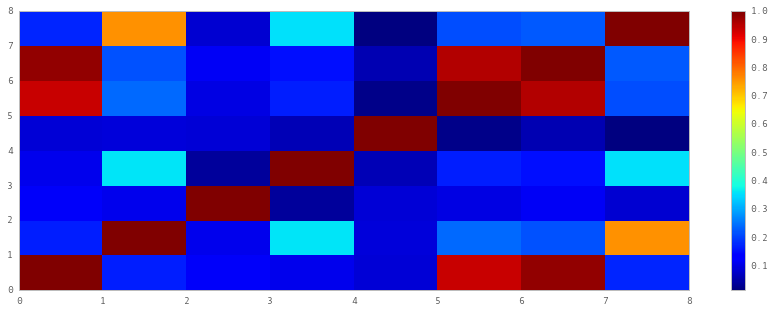

In [126]:
plt.pcolor(np.abs(np.corrcoef(scaler.X_num_scaled.T))) #also look at categories?
plt.colorbar()

In [127]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [128]:
from sklearn import linear_model
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha=10.)

# Train the model using the training sets
regr.fit(X_train, y_train)



Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


('Coefficients: \n', array([-0.01225592,  0.0575371 ,  0.01472234, -0.00373186,  0.03454942,
       -0.08596292,  0.03459182,  0.02839845,  0.        ,  0.        ,
        0.02484719, -0.02484719,  0.        ,  0.        ,  0.        ,
       -0.11079449,  0.11079449, -0.034319  ,  0.08167632,  0.02558298,
        0.01839065, -0.09133095,  0.        ,  0.02982175, -0.01354852,
        0.03139818, -0.04767141,  0.        ,  0.        , -0.03116599,
        0.03116599,  0.        ,  0.00201764, -0.00201764,  0.        ,
        0.01817738, -0.01817738,  0.        , -0.00129767,  0.00129767,  0.        ]))
Residual sum of squares: 0.14
Variance score: -0.05


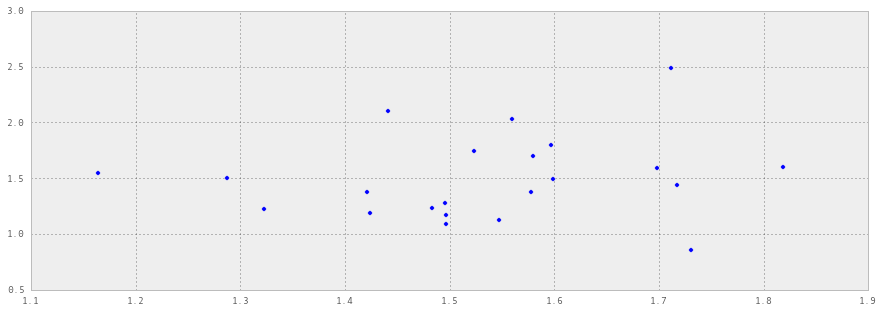

In [130]:
plt.scatter(regr.predict(X_test),y_test)


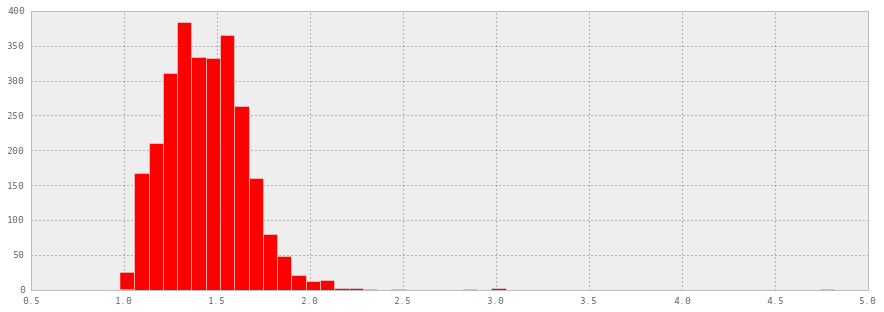

mean = 1.436077593 std = 0.224327362205


In [137]:
predictions = regr.predict(X_predict)
plt.hist(predictions,bins=50)
plt.show()
print "mean =",predictions.mean(),"std =",predictions.std()

In [141]:
import pickle
pickle.dump(regr, open( "pickle/dumb_ridge_regression.p", "wb" ) )
pickle.dump(process_df,open("pickle/process_df.p","wb"))
pickle.dump(scaler,open("pickle/scaler.p","wb"))
pickle.dump(drop,open("pickle/drop.p","wb"))